# Lab 10 - 05/12

Link github: https://github.com/ilariavascotto/UL_2023_fall

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import DBSCAN, MeanShift
import myfunctions as f

## Ex 1

In [2]:
aggregation = pd.read_csv("Datasets/Aggregation.txt", sep="\t", header=None)
data = np.array(aggregation[[0,1]])
labels = np.array(aggregation[[2]])

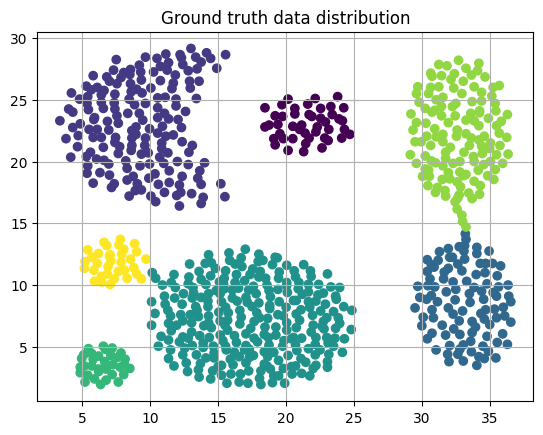

In [3]:
plt.scatter(data[:,0], data[:,1], c=labels)
plt.title('Ground truth data distribution')
plt.grid()
plt.show()

In [4]:
def f_score(data, labels, centers):
    """
    Computes the F score
    """
    ssw = np.sum([np.linalg.norm(data[i] - centers[labels[i]])**2 for i in range(len(data))])
    ssw2 = np.sum([np.sum([(labels[i] == j)*(np.linalg.norm(data[i,:] - centers[j,:])**2) for i in range(data.shape[0])]) for j in range(len(centers))])
    # da capire su quali dati fare la media
    ssb = np.sum([len(data[labels == i])*np.linalg.norm(np.mean(data[labels == i], axis = 0) - centers[i])**2 for i in range(len(centers))])
    return (len(centers) - ssw)/(ssb), ssw - ssw2

The maximum value of NMI is 1.0000000000000002 and is obtained with dc: 2.5


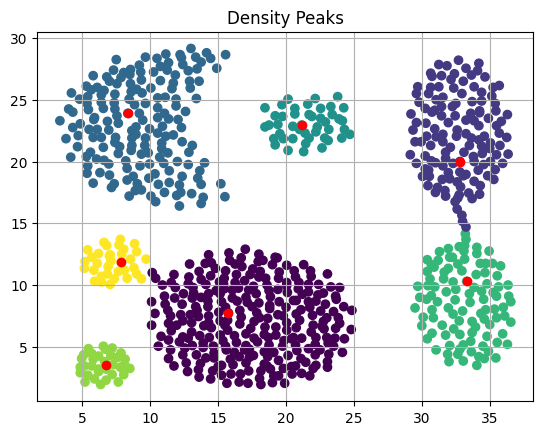

In [5]:
NMI = []
dc = [i*0.5 for i in range(1,11)]
for i in dc:
    new_labels, centers = f.density_peaks(data, k=7, dc = i)
    NMI.append(f.normalized_mutual_information(new_labels, labels))
print(f"The maximum value of NMI is {np.max(NMI)} and is obtained with dc: {dc[np.argmax(NMI)]}")
new_labels, centers = f.density_peaks(data, k=7, dc = dc[np.argmax(NMI)])

plt.scatter(data[:,0], data[:,1], c=new_labels)
plt.plot(centers[:,0], centers[:,1], 'ro')
plt.title('Density Peaks')
plt.grid()
plt.show()

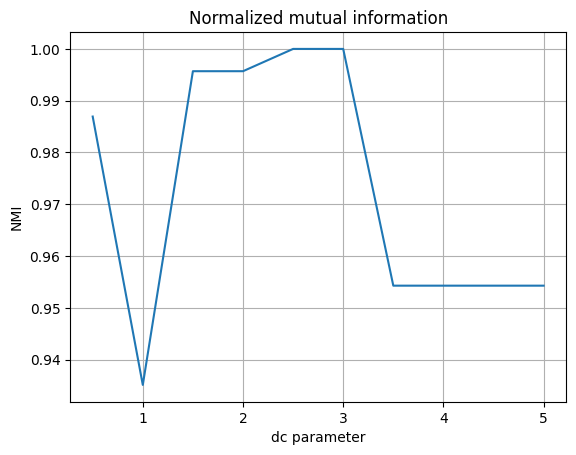

In [6]:
plt.plot(dc, NMI)
plt.title('Normalized mutual information')
plt.grid()
plt.xlabel('dc parameter')
plt.ylabel('NMI')
plt.show()

The NMI with k-means++ labels is: 0.839904882958842


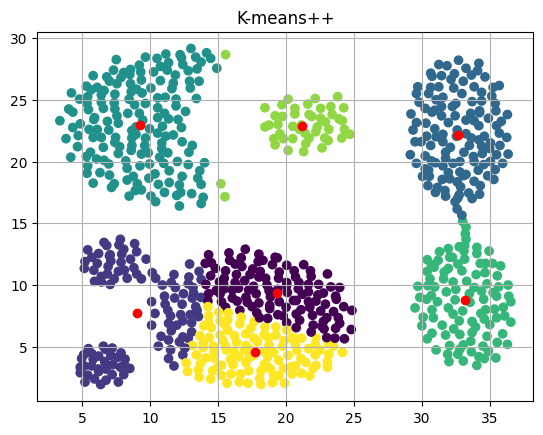

In [7]:
k_labels, _, centroids = f.k_means(data, k = 7, init = 'def')
k_NMI = f.normalized_mutual_information(k_labels, labels)
print(f"The NMI with k-means++ labels is: {k_NMI}")
plt.scatter(data[:,0], data[:,1], c=k_labels)
plt.plot(centroids[:,0], centroids[:,1], 'ro')
plt.title('K-means++')
plt.grid()
plt.show()

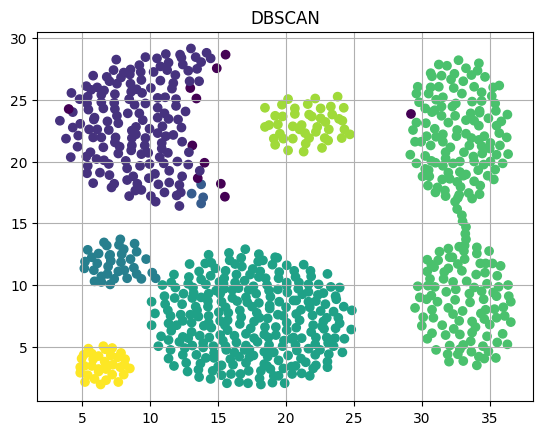

In [8]:
dbscan = DBSCAN(eps=1.1).fit_predict(data)
plt.scatter(data[:,0], data[:,1], c=dbscan)
plt.title('DBSCAN')
plt.grid()
plt.show()

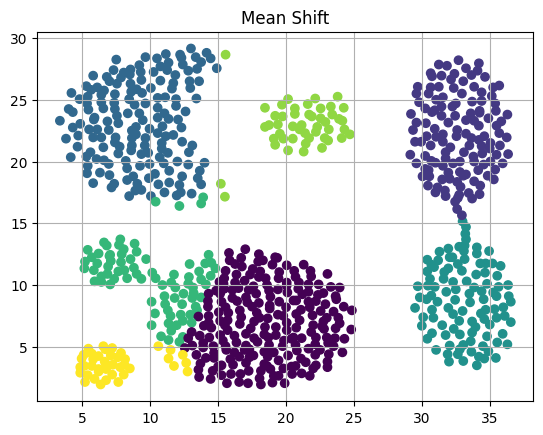

In [9]:
meanshift = MeanShift(bandwidth=4.0).fit_predict(data)
plt.scatter(data[:,0], data[:,1], c=meanshift)
plt.title('Mean Shift')
plt.grid()
plt.show()